In [1]:
%pylab inline

import pandas as pd
import pickle
import requests
import quandl

import sys
sys.path.append('/Users/isaacdrachman/GitHub')
from portfolio import risk
risk.DATA_DIR = '/Users/isaacdrachman/GitHub/Core/data'

rcParams["axes.grid"] = True
rcParams["figure.figsize"] = (12,8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
quandl.ApiConfig.api_key = open('keys/quandl.keys', 'r').read().split('\n')[0]

In [4]:
# Get price of 
px = risk.get_prices(risk.get_data(['FEZ']))

In [5]:
# Get dividend futures with expiries Dec2014 to Dec2028 from launch (2013-09-09) to present
div_futures = ['FEXDZ%d'%(year+2014) for year in range(15)]
divs = {}
for div in div_futures:
    divs[div] = quandl.get('EUREX/%s'%div, start_date='2013-09-09', end_date='2022-03-16').Settle 
divs = pd.DataFrame(divs)

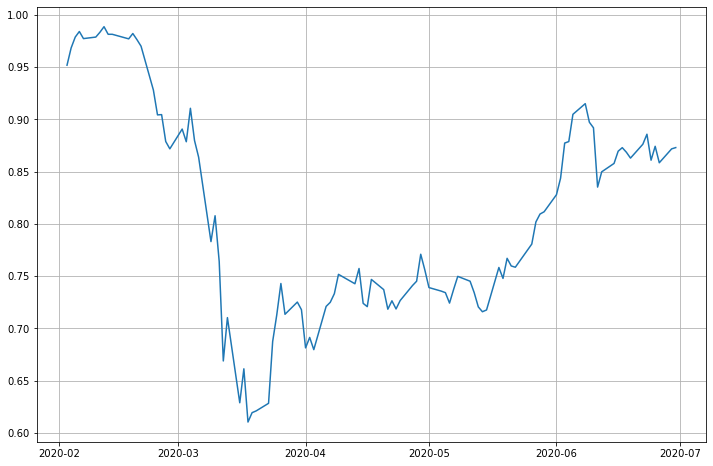

In [43]:
# 2/27/20, FEZ hit down 10% vs. 126-day high.
# 6/5/20, FEZ recovered to down 10% vs. 126-day high.
plot((px/px.rolling(126).max())['2020-02-01':'2020-06-30'])

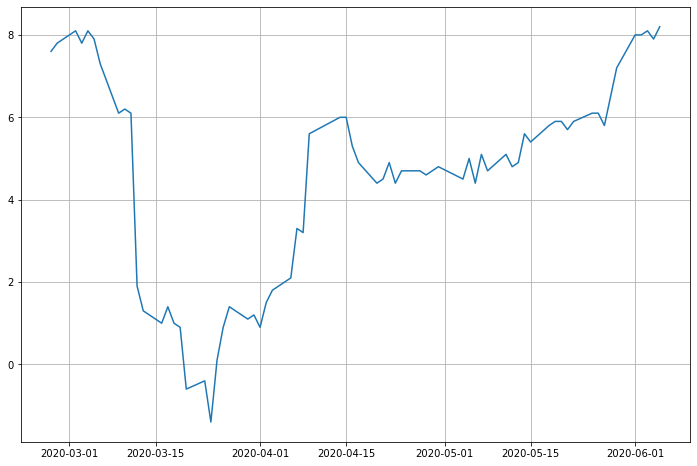

In [48]:
plot(divs.FEXDZ2025['2020-02-27':'2020-06-05'] - divs.FEXDZ2028['2020-02-27':'2020-06-05'])